# K-Means

Clustering means finding clusters in Dataset, unsupervised. Cluster is a group of objects that are similar to other objects in the cluster, and dissimilar to data points in other clusters.<br>
Applications of Clustering :-
* Retail/Marketing :- Identifying buying patterns of customers. Recommending to new customers
* Banking :- Fraud Detection in Credit card use. Identify clusters of customers
* Insurance :- Fraud Detection in claim analysis. Insurance risk of customers
* Publication :- Auto-categorizing news based on their content. Recommending similar news article.
* Medicine :- Characterizing patient behavior
* Biology :- Clustering genetic markers to identify family ties.

#### Why Clustering ?
1. Exploratory data analysis
2. Summary generation
3. Outlier detection
4. Finding duplicates
5. Pre-processing step

#### Types of Clustering :-
1. Partion-based Clustering :- Relatively Efficient. 
   * Examples :- K-means, K-median, Fuzzy c-means
2. Hierarchical Clustering :- Produces tree of clusters.
   * Examples :- Agglomerative, Divisive
3. Density-based Clustering :- Produces arbitary shaped clusters.
   * Examples :- DBSCAN

### K-Means Clustering :-
It is a Partitioning Clustering. K-means divides data into non-overlapping subsets without any cluster internal structure. Examples within a cluster are very similar. Examples across different clusters are very different. <br>
K-means minimizes intra-cluster distances and maximizes inter-cluster distances.
$$Distance(x_{1}, x_{2}) = \sqrt{\sum\limits _{i=0}^{n}(x_{1i}-x_{2i})^2} $$
#### K-Mean algorithm :-
1. Initialize K for centroids randomly.
2. Distance Calculation.
3. Assign each point to the closest centroid.
$$SSE = \sum\limits _{i=0}^{n}(x_{i} - C_{i})^2$$
4. Compute new centroids.
5. Repeat Until there are no changes.
#### K-Mean Accuracy :-
Internal Approach :- Compare Clusters with ground truth, if it is available. <br>
External Approach :- Average the distance between data points within a cluster.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CustomerSegmentation.csv")
data = data.drop("Address", axis=1)

In [3]:
from sklearn.preprocessing import StandardScaler
X = data.values[:, 1:]
X = np.nan_to_num(X)
Clust_data = StandardScaler().fit_transform(X)

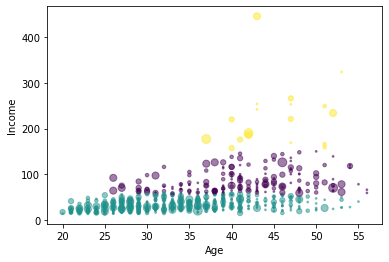

In [4]:
from sklearn.cluster import KMeans
clusterNumber = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNumber, n_init=12)
k_means.fit(X)
labels = k_means.labels_
data["Clus_km"] = labels
data.groupby("Clus_km").mean()
area = np.pi*(X[:,1]) ** 2
plt.scatter(X[:,0], X[:,3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

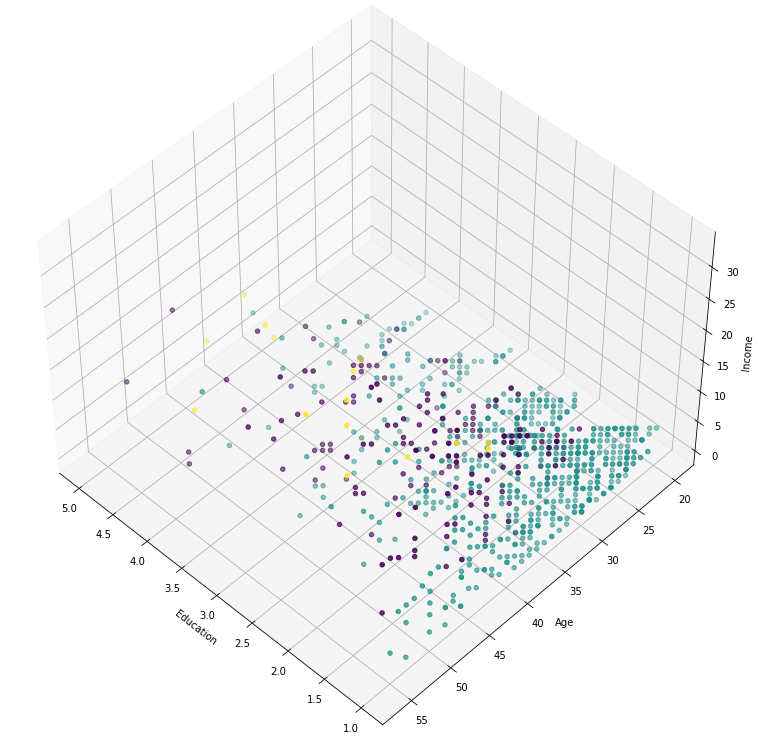

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax)
plt.cla()
ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")
ax.scatter(X[:,1], X[:,0], X[:,2], c=labels.astype(np.float64))
plt.show()